# Predicting Heart Diseases
Using the Machine learning algorithm 'K neighbors Classifier' to make predictions whether a patient is likely to have a heart disease.

Import all necessary libraries required for making predictions.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
from sklearn.neighbors import KNeighborsClassifier

Import the dataset into the environment, downloaded from https://www.kaggle.com/ronitf/heart-disease-uci

In [4]:
data_set = pd.read_csv('/Users/kabeywansa/Desktop/Machine Learning/Assignment/dataset.csv')

Summerize and show statistics for the dataset provided

In [5]:
data_set.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


Generate a visual summery for the dataset provided

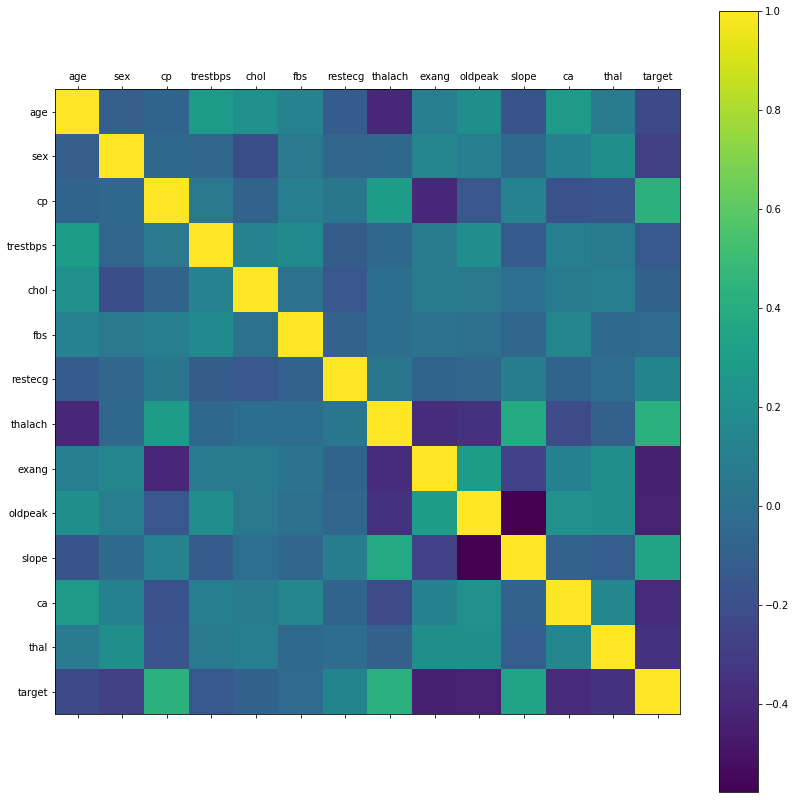

In [7]:
rcParams['figure.figsize'] = 20, 14
plt.matshow(data_set.corr())
plt.yticks(np.arange(data_set.shape[1]), data_set.columns)
plt.xticks(np.arange(data_set.shape[1]), data_set.columns)
plt.colorbar()

Visualize variables using histograms

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a17a0ce10>,
      dtype=object)

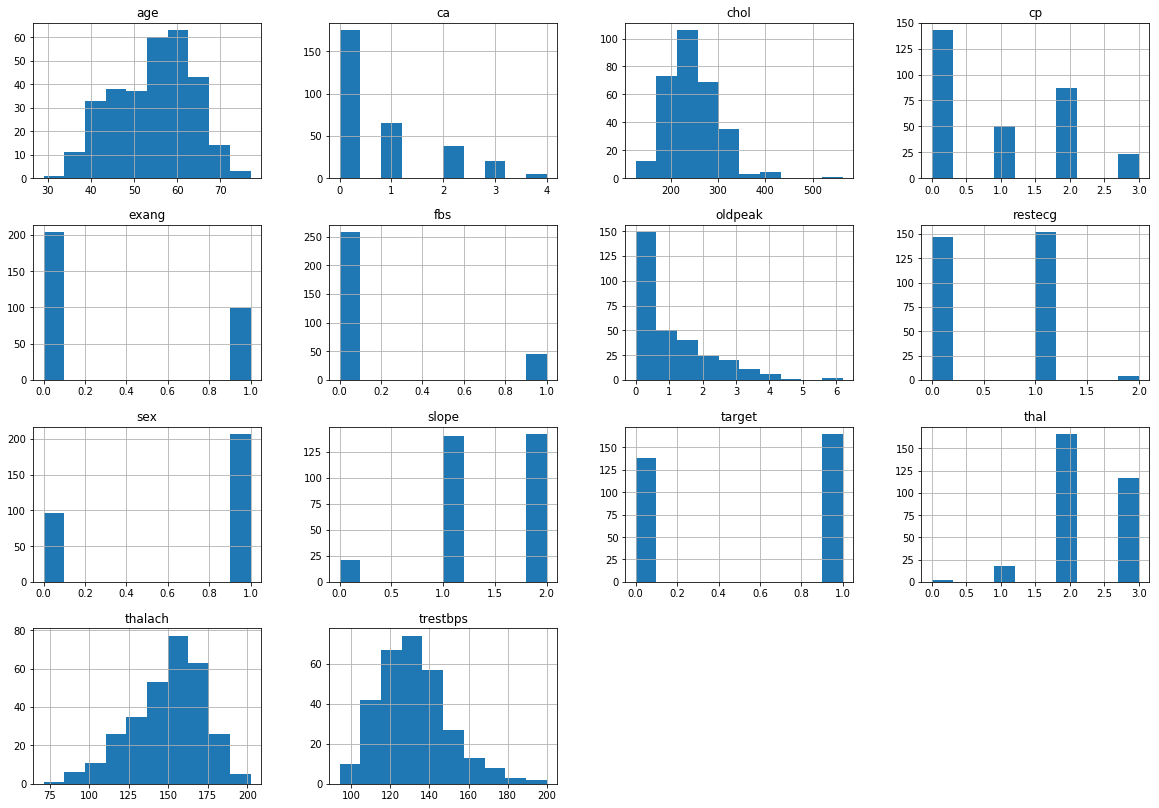

In [8]:
data_set.hist()

Checking for the distribution of the target class in the provided dataset.

Text(0.5, 1.0, 'Target Class Distribution')

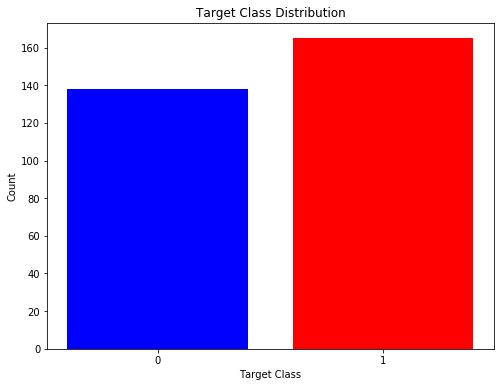

In [9]:
rcParams['figure.figsize'] = 8,6
plt.bar(data_set['target'].unique(), data_set['target'].value_counts(), color = ['red', 'blue'])
plt.xticks([0, 1])
plt.xlabel('Target Class')
plt.ylabel('Count')
plt.title('Target Class Distribution')

Creating dummy columns to convert categorical values into dummy variables and scaling the dataset

In [10]:
data_set = pd.get_dummies(data_set, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])

In [11]:
standardScaler = StandardScaler()
scale_columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
data_set[scale_columns] = standardScaler.fit_transform(data_set[scale_columns])

Splitting the dataset into 02 as training data and testing data to train and test the algorithm

In [12]:
Y = data_set['target']
X = data_set.drop(['target'], axis = 1)
x_training, x_testing, y_training, y_testing = train_test_split(X, Y, test_size = 0.33, random_state = 0)

Using the 'K Neighbors Classifier' algorithm, plotting a score graph representing different number of neighbors.

In [13]:
knn_scores = []
for k in range(1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    knn_classifier.fit(x_training, y_training)
    knn_scores.append(knn_classifier.score(x_testing, y_testing))

Text(0.5, 1.0, 'KNN Classifier scores with different K values')

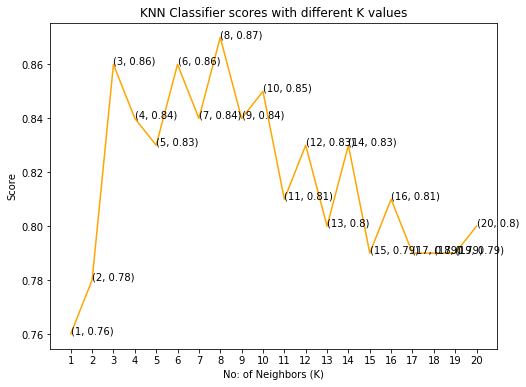

In [14]:
plt.plot([k for k in range(1, 21)], knn_scores, color = 'orange')
for i in range(1,21):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('No: of Neighbors (K)')
plt.ylabel('Score')
plt.title('KNN Classifier scores with different K values')

The max score from the algorithm

In [15]:
print("The maximum score obtained for K Neighbors Classifier is {}% with {} nieghbors.".format(knn_scores[7]*100, 8))

The maximum score obtained for K Neighbors Classifier is 87.0% with 8 nieghbors.
